In [ ]:
%pip install ucimlrepo

#Machine Exercise 6
###Miguel Luis Martinez, Juan Carlos Roldan, Jeryl Salas | AI 221 WZZQ Shannon Batch | University of the Philippines Diliman

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import io


## Loading the Dataset

In [ ]:
# I fetched the data using the ucimlrepo on pip

# Fetch dataset
travel_reviews = fetch_ucirepo(id=484)

# Data (as pandas DataFrame)
X = travel_reviews.data.features

# Check for missing values
print(X.isnull().sum())

None
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64


##Trip Advisor Travel Reviews Clustering and Density Estimation

### a. Perform K-means clustering on different K values from 2 to 10

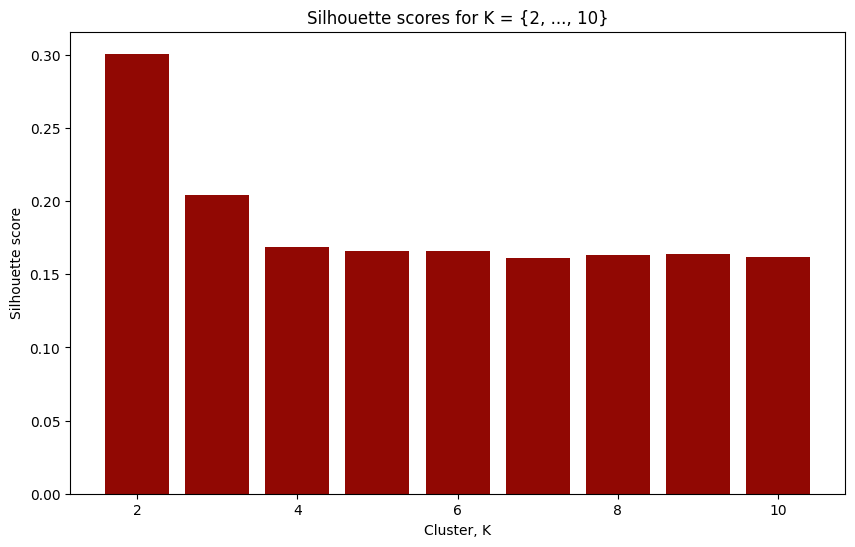

In [ ]:
# Try different numbers of clusters
silhouette_scores = []
for k in range(2, 11):  # Testing from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    values = silhouette_samples(X, labels)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.bar([x + 2 for x in range(len(silhouette_scores))], silhouette_scores, color='#910803')
plt.xlabel('Cluster, K')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores for K = {2, ..., 10}')
plt.show()

### b. Perform K-means clustering on different K values from 2 to 10 after PCA dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

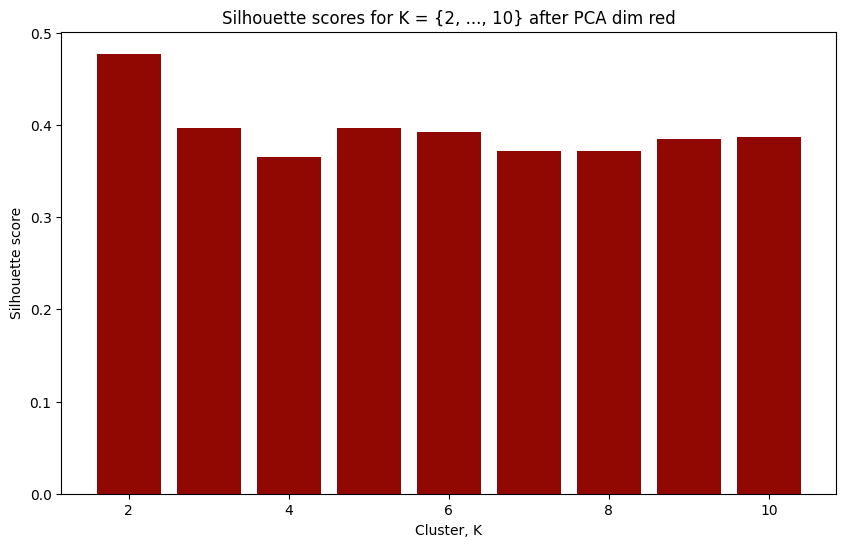

In [ ]:
# Try different numbers of clusters
silhouette_scores = []
for k in range(2, 11):  # Testing from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    values = silhouette_samples(X_pca, labels)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.bar([x + 2 for x in range(len(silhouette_scores))], silhouette_scores, color='#910803')
plt.xlabel('Cluster, K')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores for K = {2, ..., 10} after PCA dim red')
plt.show()

### c. Use Kernel Density Estimation from the 2-D dataset

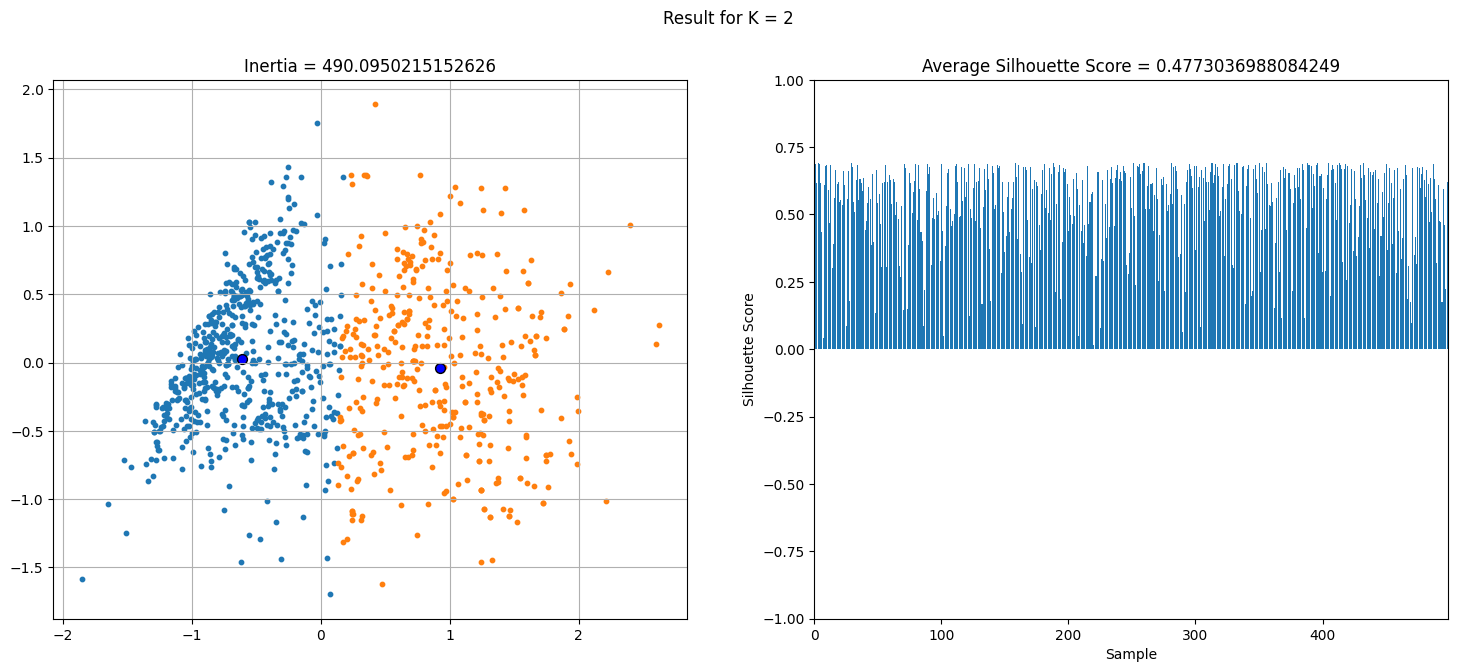

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
values = silhouette_samples(X_pca, labels)
score = silhouette_score(X_pca, labels)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
fig.suptitle(f"Result for K = {k}")
for i in range(0,k):
    ax1.scatter(X_pca[labels == i,0], X_pca[labels == i,1], s=10)
ax1.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
ax1.set_title(f"Inertia = {inertia}")
ax1.grid()
sample = 0
for i in range(0,k):
    sil = values[labels == i]
    ax2.bar(np.arange(sample,sample + sil.size),sil)
    sample = sample + sil.size
ax2.axis([0, 499, -1, 1])
ax2.set_xlabel('Sample')
ax2.set_ylabel('Silhouette Score')
ax2.set_title(f"Average Silhouette Score = {score}")
plt.show()

Threshold (KDE) = 0.03631271390280246


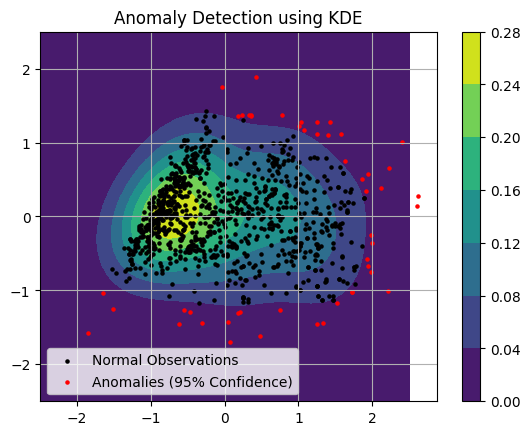

In [ ]:
# Make a meshgrid for plotting surfaces
Xp, Yp = np.meshgrid(np.linspace(-2.5,2.5),np.linspace(-2.5,2.5))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian',bandwidth=0.4).fit(X_pca)
Zp = np.exp(kde.score_samples(XY))
Zp = Zp.reshape(Xp.shape)

scores = kde.score_samples(X_pca)
threshold = np.quantile(scores,0.05)
print(f"Threshold (KDE) = {np.exp(threshold)}")

normals = X_pca[scores > threshold,:]
anomals = X_pca[scores <= threshold,:]

cntr = plt.contourf(Xp, Yp, Zp, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (95% Confidence)')
plt.title('Anomaly Detection using KDE')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

## Anomaly Detection in a Wastewater Treatment Plant

### Loading the Dataset


In [ ]:
df = pd.read_csv('/content/water-treatment.data', delimiter=',', header=None)
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
1,D-11/3/90,29156,2.50,7.7,206,451,194,69.1,4.5,1249,...,1338,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
2,D-12/3/90,39246,2.00,7.8,172,506,200,69.0,5.0,1865,...,1616,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6
3,D-13/3/90,42393,0.70,7.9,189,478,230,67.0,5.5,1410,...,1575,0.6,45.8,92.0,11.6,25.7,19.6,36.0,43.0,36.4
4,D-18/3/90,40923,3.50,7.6,146,329,188,57.4,2.5,1300,...,1545,32.7,33.3,90.0,82.6,61.3,87.0,71.4,78.2,99.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,D-19/8/91,32363,0.10,7.6,159,310,146,68.5,1.6,1096,...,1083,25.2,61.4,91.2,78.6,65.1,86.8,81.0,89.0,99.4
376,D-20/8/91,31437,0.47,7.6,132,304,148,64.9,2.0,939,...,1012,45.6,60.3,94.4,82.5,72.9,89.4,86.2,91.2,99.5
377,D-22/8/91,28088,0.20,7.5,153,307,124,82.3,2.5,1044,...,1038,40.5,54.4,94.0,89.7,75.5,93.5,85.0,90.3,100
378,D-23/8/91,27838,0.13,7.6,179,265,128,71.9,1.8,992,...,1044,13.7,45.0,95.0,87.5,71.3,93.9,79.6,89.1,100


### a. Perform DBSCAN on the 38-feature data set

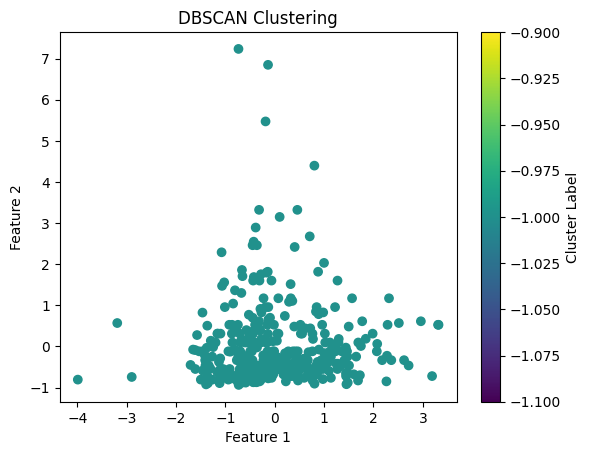

In [ ]:
X = df.iloc[:, 1:].values
scaler = StandardScaler()
X_scl= scaler.fit_transform(X)

plt.scatter(X_scl[:, 0], X_scl[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

Num of outliers:  10
Outliers:
             0      1     2    3    4    5     6     7    8     9   ...    29  \
3     D-13/3/90  42393  0.70  7.9  189  478   230  67.0  5.5  1410  ...  1575   
47     D-5/6/90  39421  1.00  7.9  189  457  1004  25.5   24  1218  ...  1172   
63    D-26/6/90  44198  7.00  7.7  257  667  1016  31.5   22  1478  ...  1378   
108   D-29/4/90  27333  2.00  7.6  238  348   174  64.4  3.5  1110  ...  1256   
128   D-25/7/90  33959  2.00  7.7  235  614   692  29.5  8.0  1589  ...  1625   
216  D-22/10/90  48950  2.50  8.1  109  211   880  13.2  5.5  1745  ...  1495   
276   D-29/1/91  32974  2.60  8.1  311  420   208  69.2  6.5  1474  ...  1466   
278   D-31/1/91  34579  2.50  8.3  261  592   216  71.3  7.5  1663  ...  1848   
300   D-28/5/91  38809  0.75  7.6  179  432  1228  22.8   36  1889  ...  1932   
324   D-29/4/91  35760  1.77  7.6  115  295   182  51.6   25  1400  ...  1316   

       30    31    32    33    34    35    36    37    38  
3     0.6  45.8  

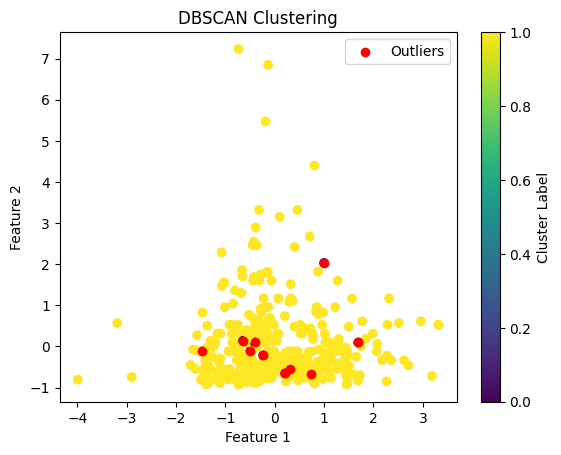

In [ ]:
minPts = 3
eps = 7
dbscan = DBSCAN(eps=eps, min_samples=minPts)
dbscan.fit(X_scl)
labels = dbscan.labels_
outliers_ind = np.where(labels == -1)[0]
outliers = df.iloc[outliers_ind]

print("Num of outliers: ", len(outliers))
print("Outliers:")
print(outliers)

plt.scatter(X_scl[:, 0], X_scl[:, 1], c=labels, cmap='viridis')
plt.scatter(X_scl[outliers_ind, 0], X_scl[outliers_ind, 1], c='red', label='Outliers')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

### b. Perform anomaly detection methods after dimensionality reduction

In [ ]:
pca = PCA(n_components=2)
X_scl_pca = pca.fit_transform(X_scl)

Threshold (KDE) = 0.0030590365844447237


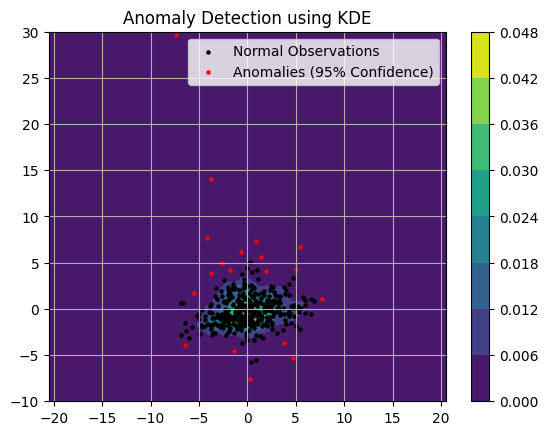

In [ ]:
# Make a meshgrid for plotting surfaces
Xp, Yp = np.meshgrid(np.linspace(-20.5,20.5),np.linspace(-10,30))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian',bandwidth=0.4).fit(X_scl_pca)
Zp = np.exp(kde.score_samples(XY))
Zp = Zp.reshape(Xp.shape)

scores = kde.score_samples(X_scl_pca)
threshold = np.quantile(scores,0.05)
print(f"Threshold (KDE) = {np.exp(threshold)}")

normals = X_scl_pca[scores > threshold,:]
anomals = X_scl_pca[scores <= threshold,:]

cntr = plt.contourf(Xp, Yp, Zp, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (95% Confidence)')
plt.title('Anomaly Detection using KDE')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

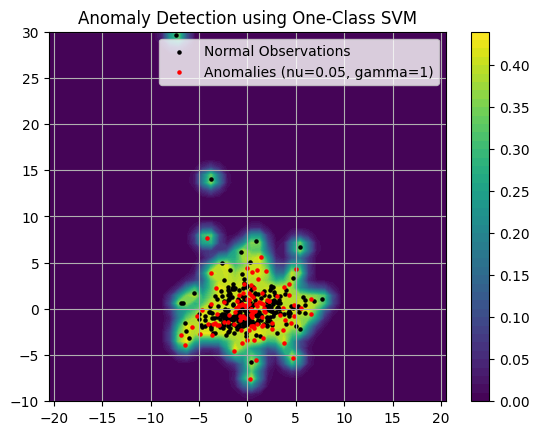

In [ ]:
ocsvm = OneClassSVM(nu=0.05, gamma=1).fit(X_scl_pca)
Zp = ocsvm.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = ocsvm.predict(X_scl_pca)
normals = X_scl_pca[y_pred == 1,:]
anomals = X_scl_pca[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=50, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (nu=0.05, gamma=1)')
plt.title('Anomaly Detection using One-Class SVM')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

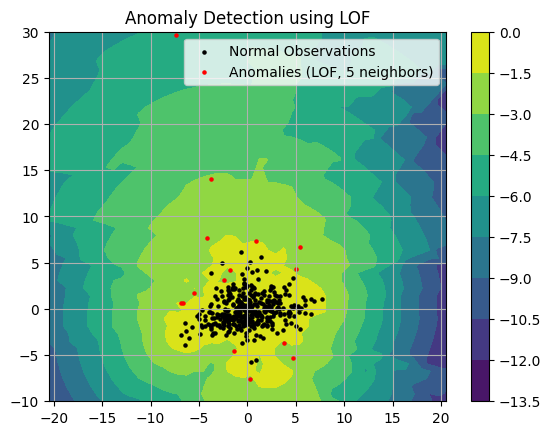

In [ ]:
lof = LocalOutlierFactor(n_neighbors=5,novelty=True).fit(X_scl_pca)
Zp = lof.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = lof.predict(X_scl_pca)
normals = X_scl_pca[y_pred == 1,:]
anomals = X_scl_pca[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=10, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (LOF, 5 neighbors)')
plt.title('Anomaly Detection using LOF')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()